In [13]:
## import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import gc 

%matplotlib inline

Load the inital datasets

In [14]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
sample_submission = pd.read_csv("input/gender_submission.csv")

#### Basic EDA

In [9]:
## Data shape

print("Shape of Training Dataset:", train_data.shape)
print("Shape of Test dataset:", test_data.shape)
print("Shape of sample submission:", sample_submission.shape)

Shape of Training Dataset: (891, 12)
Shape of Test dataset: (418, 11)
Shape of sample submission: (418, 2)


In [11]:
#Check for missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Distribution of the target variable                         
**Survived**                          
0 --> Not Survived                        
1 --> Survived                          

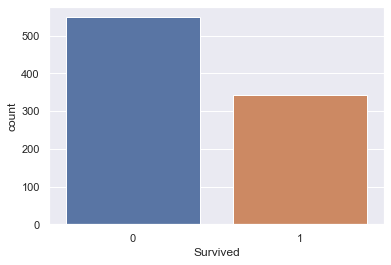

In [22]:
sns.set_theme(style = "darkgrid")
ax = sns.countplot(x='Survived', data = train_data)


In [18]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [19]:
train_data["Survived"].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

**Survival percentage based on Gender**

In [21]:
train_data["Sex"].value_counts(normalize=True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


Based on Gender, the public board was 0.76555

**Survival percentage based on Passenger Class**

In [24]:
train_data["Pclass"].value_counts(normalize=True)

3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [32]:
class1 = train_data.loc[train_data.Pclass == 1]["Survived"]
rate_class1 = sum(class1)/len(class1)

class2 = train_data.loc[train_data.Pclass == 2]["Survived"]
rate_class2 = sum(class2)/len(class2)

class3 = train_data.loc[train_data.Pclass == 3]["Survived"]
rate_class3 = sum(class3)/len(class3)

print("% of Class 1 passengers who survived:", rate_class1)
print("% of Class 2 passengers who survived:", rate_class2)
print("% of Class 3 passengers who survived:", rate_class3)

% of Class 1 passengers who survived: 0.6296296296296297
% of Class 2 passengers who survived: 0.47282608695652173
% of Class 3 passengers who survived: 0.24236252545824846


Based on Pclass, the public board was 0.67224

Based on PClass & Sex, the public board was 0.77511

**Survival percentage based on Siblings and Spouse (Sibsp)**

In [31]:
train_data["SibSp"].value_counts(normalize=True)

0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: SibSp, dtype: float64

In [36]:
sibsp0 = train_data.loc[train_data.SibSp == 0]["Survived"]
rate_sibsp0 = sum(sibsp0)/len(sibsp0)

sibsp1 = train_data.loc[train_data.SibSp == 1]["Survived"]
rate_sibsp1 = sum(sibsp1)/len(sibsp1)

sibsp2 = train_data.loc[train_data.SibSp == 2]["Survived"]
rate_sibsp2 = sum(sibsp2)/len(sibsp2)

sibsp3 = train_data.loc[train_data.SibSp == 3]["Survived"]
rate_sibsp3 = sum(sibsp3)/len(sibsp3)

sibsp4 = train_data.loc[train_data.SibSp == 4]["Survived"]
rate_sibsp4 = sum(sibsp4)/len(sibsp4)

sibsp5 = train_data.loc[train_data.SibSp == 5]["Survived"]
rate_sibsp5 = sum(sibsp5)/len(sibsp5)

sibsp8 = train_data.loc[train_data.SibSp == 8]["Survived"]
rate_sibsp8 = sum(sibsp8)/len(sibsp8)

print("% of Sibsp 0 who survived:", rate_sibsp0)
print("% of sibsp 1 who survived:", rate_sibsp1)
print("% of Sibsp 2 who survived:", rate_sibsp2)
print("% of sibsp 3 who survived:", rate_sibsp3)
print("% of Sibsp 4 who survived:", rate_sibsp4)
print("% of sibsp 5 who survived:", rate_sibsp5)
print("% of sibsp 8 who survived:", rate_sibsp8)

% of Sibsp 0 who survived: 0.34539473684210525
% of sibsp 1 who survived: 0.5358851674641149
% of Sibsp 2 who survived: 0.4642857142857143
% of sibsp 3 who survived: 0.25
% of Sibsp 4 who survived: 0.16666666666666666
% of sibsp 5 who survived: 0.0
% of sibsp 8 who survived: 0.0


Based on SibSP, the public board was 0.60287                 
Based on Pclass, Sex, SibSp the public board was 0.77033

**Survival percentage based on Parents and Children (Parch)**

In [37]:
train_data["Parch"].value_counts(normalize=True)

0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: Parch, dtype: float64

In [39]:
parch0 = train_data.loc[train_data.Parch == 0]["Survived"]
rate_parch0 = sum(parch0)/len(parch0)

parch1 = train_data.loc[train_data.Parch == 1]["Survived"]
rate_parch1 = sum(parch1)/len(parch1)

parch2 = train_data.loc[train_data.Parch == 2]["Survived"]
rate_parch2 = sum(parch2)/len(parch2)

parch3 = train_data.loc[train_data.Parch == 3]["Survived"]
rate_parch3 = sum(parch3)/len(parch3)

parch4 = train_data.loc[train_data.Parch == 4]["Survived"]
rate_parch4 = sum(parch4)/len(parch4)

parch5 = train_data.loc[train_data.Parch == 5]["Survived"]
rate_parch5 = sum(parch5)/len(parch5)

parch6 = train_data.loc[train_data.Parch == 6]["Survived"]
rate_parch6 = sum(parch6)/len(parch6)

print("% of parch 0 who survived:", rate_parch0)
print("% of parch 1 who survived:", rate_parch1)
print("% of parch 2 who survived:", rate_parch2)
print("% of parch 3 who survived:", rate_parch3)
print("% of parch 4 who survived:", rate_parch4)
print("% of parch 5 who survived:", rate_parch5)
print("% of parch 6 who survived:", rate_parch6)

% of parch 0 who survived: 0.34365781710914456
% of parch 1 who survived: 0.5508474576271186
% of parch 2 who survived: 0.5
% of parch 3 who survived: 0.6
% of parch 4 who survived: 0.0
% of parch 5 who survived: 0.2
% of parch 6 who survived: 0.0


### Basic Model

In [44]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "Parch"]
#features = ["Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
